In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

# Intialize Plots w/ default fig width/height
try
  fig_width = 7
  fig_height = 5
  fig_format = :retina
  fig_dpi = 96
  # no retina format type, use svg for high quality type/marks
  if fig_format == :retina
    fig_format = :svg
  # IJulia doesn't support PDF output so use png (if the DPI 
  # remains the default of 300 then set to 96)
  elseif fig_format == :pdf
    fig_format = :png
    fig_dpi = 96
  end
  # convert inches to pixels
  fig_width = fig_width * fig_dpi
  fig_height = fig_height * fig_dpi
  using Plots
  gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


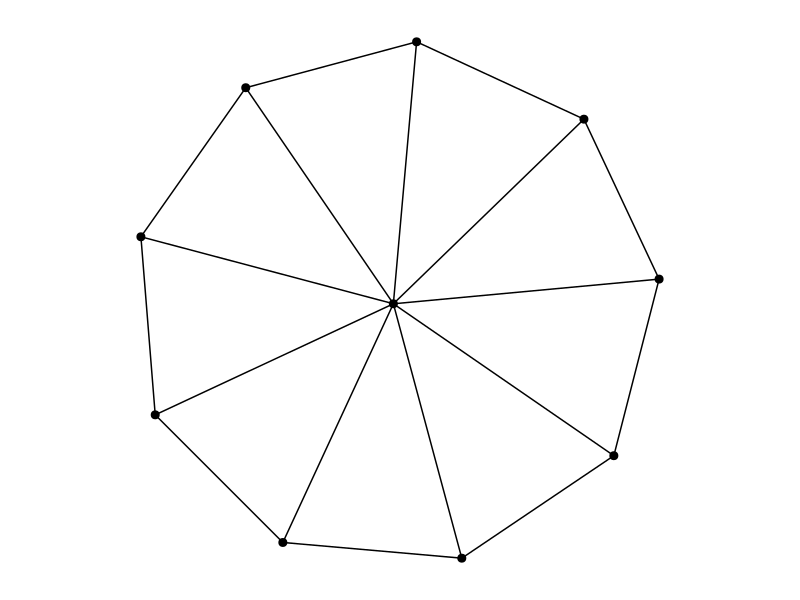

In [2]:
import CairoMakie
import GraphMakie
import Graphs 

g = Graphs.wheel_graph(10)
f, ax, p = GraphMakie.graphplot(g)
GraphMakie.hidedecorations!(ax); GraphMakie.hidespines!(ax)
ax.aspect = GraphMakie.DataAspect()
f